# Process Renovar SO2 Data according to reference station

## Constants and imports

In [187]:
input_data_directory = 'data/output/'
SENSOR_1_NAME = 'alpha_so2_1_conc'
SENSOR_2_NAME = 'alpha_so2_2_conc'
sensor_1_data_path = input_data_directory + SENSOR_1_NAME + '_dataframe.csv'
sensor_2_data_path = input_data_directory + SENSOR_2_NAME + '_dataframe.csv'
temperature_data_path = input_data_directory + 'chamber_tempdataframe.csv'
temperature_data_path_1HR = input_data_directory + 'chamber_tempdataframe_1hr.csv'

## Load Alphasense SO2 (1) sensor data

In [188]:
import pandas as pd

sensor_1_data = pd.read_csv(sensor_1_data_path)
sensor_1_data['DateTime'] = pd.to_datetime(sensor_1_data['DateTime'], infer_datetime_format=True)
sensor_1_data = sensor_1_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_1_data.index = sensor_1_data['DateTime']
sensor_1_data = sensor_1_data.drop(columns='DateTime')
sensor_1_data = sensor_1_data[['value', 'Tag']].rename(columns={'value': 'measuring 1', 'Tag': 'Tag 1'})
sensor_1_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_10514/3762244334.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_1_data['DateTime'] = pd.to_datetime(sensor_1_data['DateTime'], infer_datetime_format=True)


,measuring 1,Tag 1
DateTime,,
2022-11-20 13:45:00,NaN,STABILIZING
2022-11-20 14:00:00,NaN,STABILIZING
2022-11-20 14:15:00,NaN,STABILIZING
2022-11-20 14:30:00,NaN,STABILIZING
2022-11-20 14:45:00,NaN,STABILIZING


## Load Alphasense SO2 (2) sensor data

In [189]:
import pandas as pd

sensor_2_data = pd.read_csv(sensor_2_data_path)
sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)
sensor_2_data = sensor_2_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_2_data.index = sensor_2_data['DateTime']
sensor_2_data = sensor_2_data.drop(columns='DateTime')
sensor_2_data = sensor_2_data[['value', 'Tag']].rename(columns={'value': 'measuring 2', 'Tag': 'Tag 2'})
sensor_2_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_10514/2079243632.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)


,measuring 2,Tag 2
DateTime,,
2022-11-21 12:15:00,157.584806,STABILIZING
2022-11-21 12:30:00,155.803002,STABILIZING
2022-11-21 12:45:00,154.296330,STABILIZING
2022-11-21 13:00:00,151.793944,STABILIZING
2022-11-21 13:15:00,148.492367,STABILIZING


## Load sensor chamber temperature data

In [190]:
import pandas as pd

temperature_data = pd.read_csv(temperature_data_path)
temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)
temperature_data = temperature_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
temperature_data.index = temperature_data['DateTime']
temperature_data = temperature_data.drop(columns='DateTime')
temperature_data = temperature_data[['measuring', 'Tag']]
temperature_data = temperature_data.rename(columns={'measuring': 'temperature', 'Tag': 'Temperature Tag'})
temperature_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_10514/2292504063.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)


,temperature,Temperature Tag
DateTime,,
2022-11-21 10:45:00,NaN,MISSING
2022-11-21 11:00:00,NaN,MISSING
2022-11-21 11:15:00,NaN,MISSING
2022-11-21 11:30:00,30.375,VALID
2022-11-21 11:45:00,30.715,VALID


## Merge sensor and temperature data

In [191]:
sensor_data = pd.concat([sensor_1_data, sensor_2_data, temperature_data], axis=1, join='outer')
sensor_1_data = pd.concat([sensor_1_data, temperature_data], axis=1, join='outer')
sensor_2_data = pd.concat([sensor_2_data, temperature_data], axis=1, join='outer')

In [192]:
sensor_1_data['Temperature Tag'] = sensor_1_data['Temperature Tag'].fillna(value='VALID')
sensor_1_data['Tag 1'] = sensor_1_data['Tag 1'].fillna(value='VALID')
sensor_1_data['Hour'] = sensor_1_data.index.hour
sensor_1_data.head()

,measuring 1,Tag 1,temperature,Temperature Tag,Hour
DateTime,,,,,
2022-11-20 13:45:00,NaN,STABILIZING,NaN,VALID,13
2022-11-20 14:00:00,NaN,STABILIZING,NaN,VALID,14
2022-11-20 14:15:00,NaN,STABILIZING,NaN,VALID,14
2022-11-20 14:30:00,NaN,STABILIZING,NaN,VALID,14
2022-11-20 14:45:00,NaN,STABILIZING,NaN,VALID,14


In [193]:
sensor_2_data['Temperature Tag'] = sensor_2_data['Temperature Tag'].fillna(value='VALID')
sensor_2_data['Tag 2'] = sensor_2_data['Tag 2'].fillna(value='VALID')
sensor_2_data['Hour'] = sensor_2_data.index.hour
sensor_2_data.head()

,measuring 2,Tag 2,temperature,Temperature Tag,Hour
DateTime,,,,,
2022-11-21 10:45:00,NaN,VALID,NaN,MISSING,10
2022-11-21 11:00:00,NaN,VALID,NaN,MISSING,11
2022-11-21 11:15:00,NaN,VALID,NaN,MISSING,11
2022-11-21 11:30:00,NaN,VALID,30.375,VALID,11
2022-11-21 11:45:00,NaN,VALID,30.715,VALID,11


In [194]:
sensor_data['Temperature Tag'] = sensor_data['Temperature Tag'].fillna(value='VALID')
sensor_data['Tag 1'] = sensor_data['Tag 1'].fillna(value='VALID')
sensor_data['Tag 2'] = sensor_data['Tag 2'].fillna(value='VALID')
sensor_data['Hour'] = sensor_data.index.hour
sensor_data.head()

,measuring 1,Tag 1,measuring 2,Tag 2,temperature,Temperature Tag,Hour
DateTime,,,,,,,
2022-11-20 13:45:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,13
2022-11-20 14:00:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:15:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:30:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:45:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14


## Plot concentration and temperature

<Axes: xlabel='DateTime'>

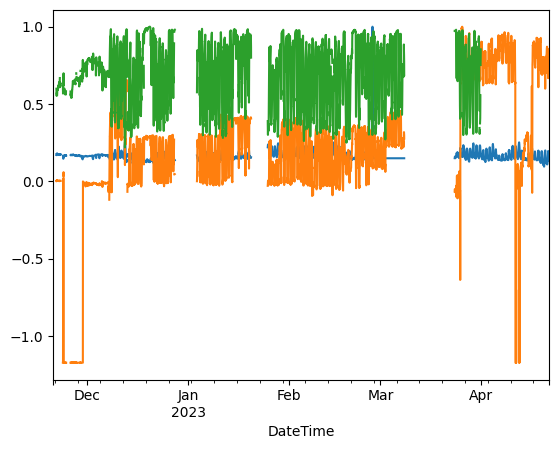

In [195]:
import numpy as np

max_temp_value = sensor_data['temperature'].max()
max_conc_value_1 = sensor_data['measuring 1'].max()
max_conc_value_2 = sensor_data['measuring 2'].max()
sensor_data['temperature'].apply(lambda v: v/max_temp_value if not np.isnan(v) else v).plot()
sensor_data['measuring 1'].apply(lambda v: v/max_conc_value_1 if not np.isnan(v) else v).plot()
sensor_data['measuring 2'].apply(lambda v: v/max_conc_value_2 if not np.isnan(v) else v).plot()

## Tag concentration data according to environmental tag

In [196]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

def tag_by_env_tag(sensor_1_tag, sensor_2_tag, env_tag):
    if sensor_1_tag != 'VALID': return sensor_1_tag
    if sensor_2_tag != 'VALID': return sensor_2_tag
    if env_tag != 'VALID': return 'INVALID_ENV'
    return 'VALID'

tags_dataframe = sensor_data[['Tag 1', 'Tag 2', 'Temperature Tag']]
sensor_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1], df[2]), axis=1)
sensor_data = sensor_data.drop(columns=['Tag 1', 'Tag 2', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_data)
data_contabilization

,#,%
MISSING,2901,19.835897
LTLL,2214,15.138462
GTUL,6027,41.210256
BADSPIKE,121,0.82735
VALID,2390,16.34188
LTQTLE01,122,0.834188
GTQTLE99,102,0.697436
INVALID_ENV,75,0.512821
TOTAL,14625,100.0


### Sensor 1

In [197]:
def tag_by_env_tag(sensor_tag, env_tag):
    if sensor_tag != 'VALID': return sensor_tag
    if env_tag != 'VALID': return 'INVALID_ENV'
    return 'VALID'

tags_dataframe = sensor_1_data[['Tag 1', 'Temperature Tag']]
sensor_1_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1]), axis=1)
sensor_1_data = sensor_1_data.drop(columns=['Tag 1', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_1_data)
data_contabilization

,#,%
MISSING,2901,19.835897
LTLL,2214,15.138462
GTUL,6027,41.210256
BADSPIKE,54,0.369231
VALID,2488,17.011966
LTQTLE01,75,0.512821
GTQTLE99,102,0.697436
INVALID_ENV,91,0.622222
TOTAL,14625,100.0


### Sensor 2

In [198]:
tags_dataframe = sensor_2_data[['Tag 2', 'Temperature Tag']]
sensor_2_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1]), axis=1)
sensor_2_data = sensor_2_data.drop(columns=['Tag 2', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_2_data)
data_contabilization

,#,%
MISSING,0,0.0
LTLL,0,0.0
GTUL,0,0.0
BADSPIKE,172,1.182862
VALID,10245,70.455952
LTQTLE01,107,0.73585
GTQTLE99,82,0.563923
INVALID_ENV,3238,22.26807
TOTAL,14541,100.0


<Axes: xlabel='DateTime'>

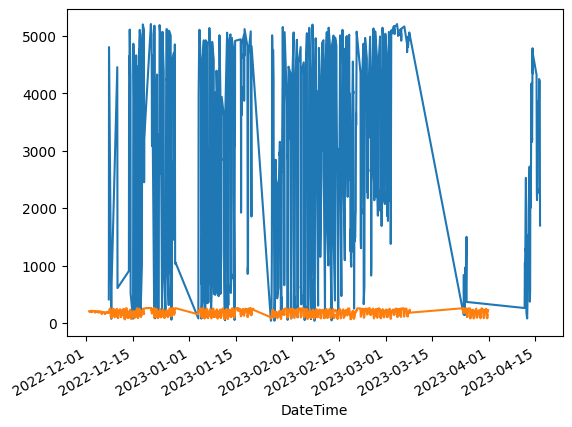

In [199]:
sensor_1_data[sensor_1_data['Tag'] == 'VALID']['measuring 1'].plot()
sensor_2_data[sensor_2_data['Tag'] == 'VALID']['measuring 2'].plot()

## Analyse data

In [200]:
valid_dataframe = sensor_data[sensor_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe_1 = sensor_1_data[sensor_1_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe_2 = sensor_2_data[sensor_2_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe_1.head()

,measuring 1,temperature,Hour
DateTime,,,
2022-12-07 18:30:00,410.810540,28.075,18
2022-12-07 18:45:00,553.367929,27.920,18
2022-12-07 19:00:00,800.108422,27.730,19
2022-12-07 19:15:00,1622.594200,27.500,19
2022-12-07 19:30:00,2889.220727,27.270,19


### Sensor 1

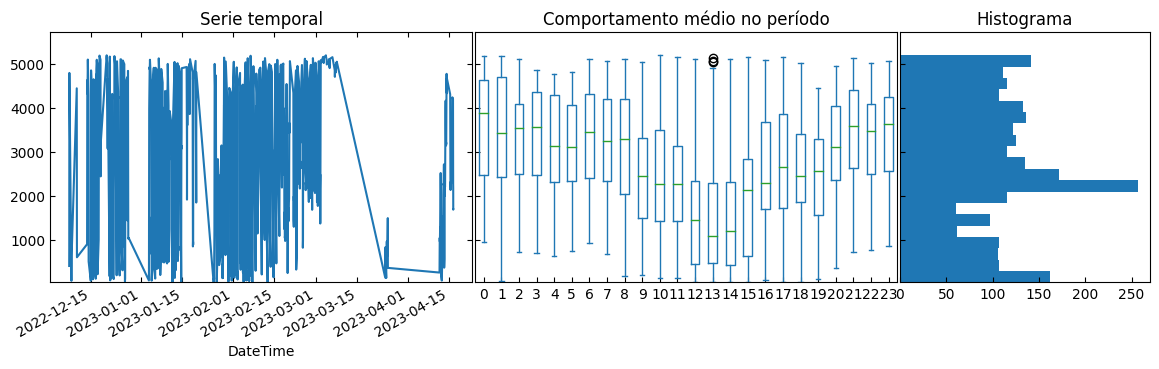

In [201]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

dataframe = valid_dataframe_1.rename(columns={'measuring 1': 'measuring'})
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

### Sensor 2

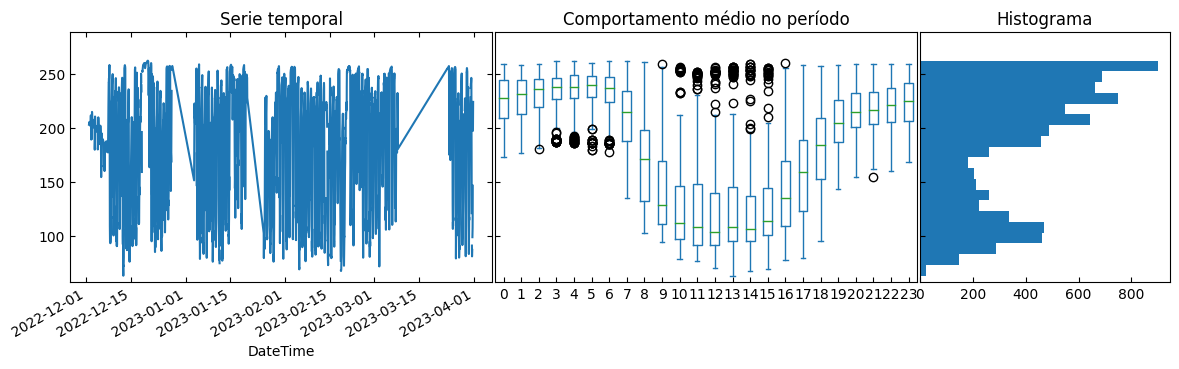

In [202]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

dataframe = valid_dataframe_2.rename(columns={'measuring 2': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

## Plot sensor 1 vs. temperature

Spearmans correlation coefficient: -0.430
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.430
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.304, p<0.05")

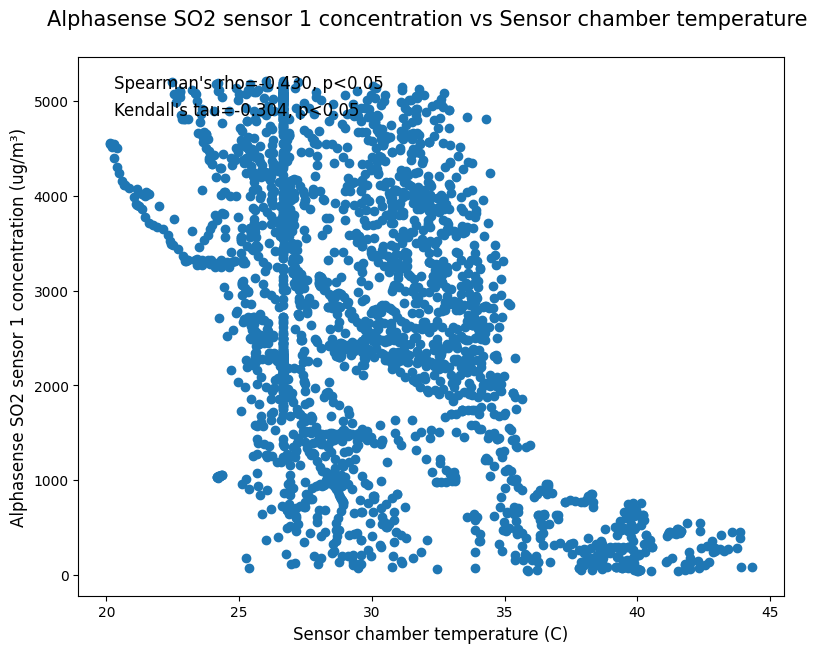

In [203]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe_1['temperature'], valid_dataframe_1['measuring 1'])
plt.title('Alphasense SO2 sensor 1 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor 1 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe_1['temperature'], valid_dataframe_1['measuring 1'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(valid_dataframe_1['temperature'], valid_dataframe_1['measuring 1'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Plot sensor 2 vs. Temperature

Spearmans correlation coefficient: -0.676
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.676
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.499, p<0.05")

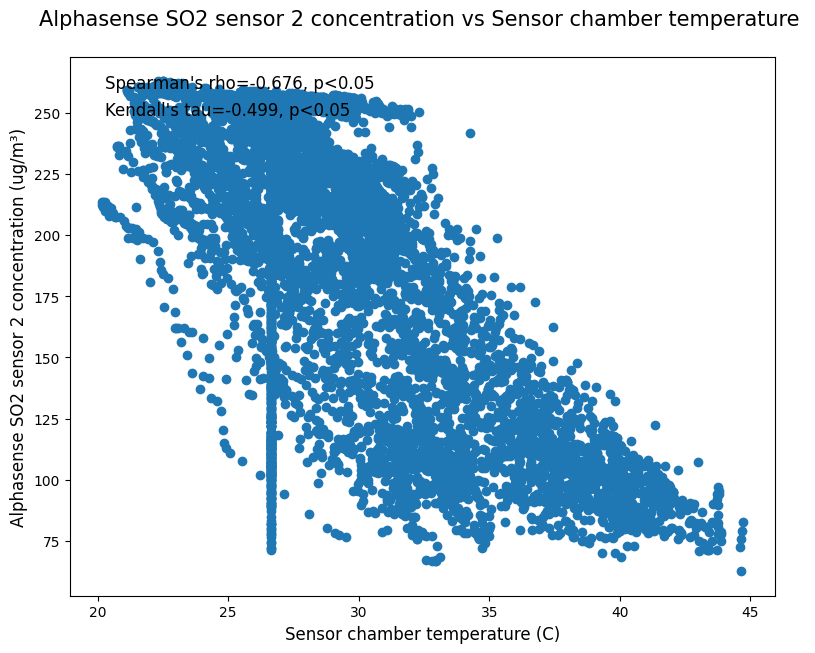

In [204]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe_2['temperature'], valid_dataframe_2['measuring 2'])
plt.title('Alphasense SO2 sensor 2 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor 2 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe_2['temperature'], valid_dataframe_2['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(valid_dataframe_2['temperature'], valid_dataframe_2['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Remove temperature dependance

### Sensor 1

In [205]:
from sklearn.linear_model import LinearRegression

sample_dataframe = valid_dataframe_1[['temperature', 'measuring 1']].dropna()
temperature = sample_dataframe['temperature']
concentration = sample_dataframe['measuring 1']

# Reshape the data to have a 2D array for sklearn
X = temperature.values.reshape(-1, 1)
y = concentration.values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict concentration based on the temperature
concentration_predicted = model.predict(X)

# Remove the temperature component from the concentration
concentration_without_temperature = y - concentration_predicted

# Create a new pandas Series with the result
result_series = pd.Series(concentration_without_temperature - np.min(concentration_without_temperature), 
                            index=sample_dataframe.index, name = 'measuring 1 no Temp')

# Print the result
print(result_series)

DateTime
2022-12-07 18:30:00     797.527465
2022-12-07 18:45:00     913.582295
2022-12-07 19:00:00    1127.835779
2022-12-07 19:15:00    1910.995179
2022-12-07 19:30:00    3138.295328
                          ...     
2023-04-16 09:45:00    3284.901992
2023-04-16 10:00:00    3332.390389
2023-04-16 10:15:00    3320.306688
2023-04-16 10:30:00    2918.501153
2023-04-16 10:45:00    3107.910019
Name: measuring 1 no Temp, Length: 2488, dtype: float64


#### Plot the results

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_10514/3051677453.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


Text(0.5, 1.0, 'Alphasense SO2 sensor 1 concentration without temperature component vs Sensor chamber temperature \n')

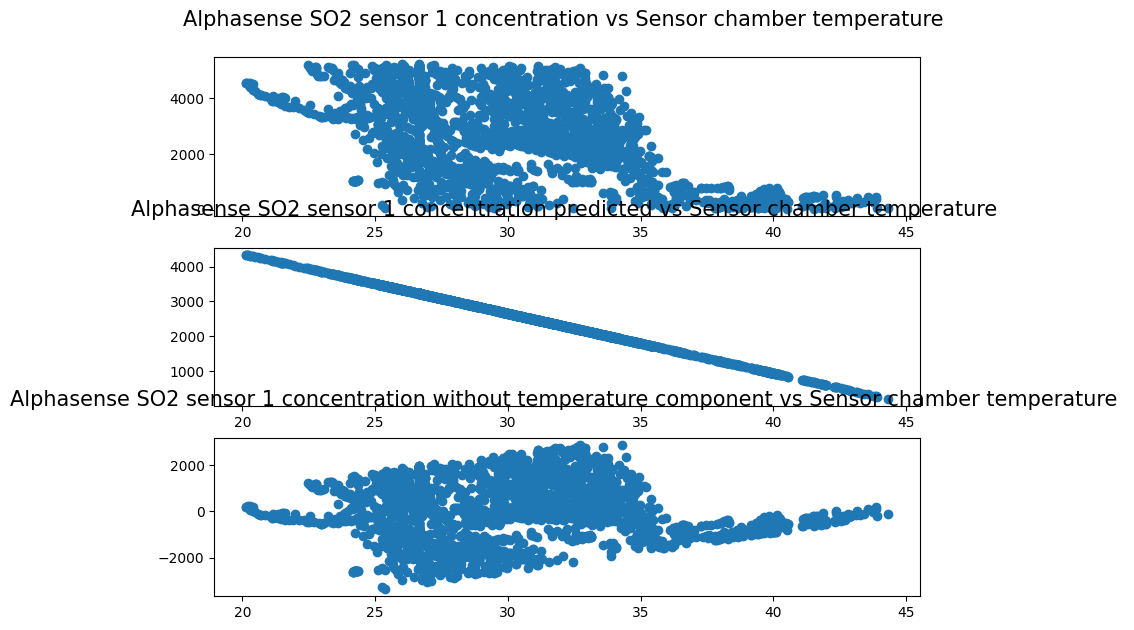

In [206]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.subplot(3,1,1)
plt.scatter(temperature, concentration)
plt.title('Alphasense SO2 sensor 1 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,2)
plt.scatter(temperature, concentration_predicted)
plt.title('Alphasense SO2 sensor 1 concentration predicted vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,3)
plt.scatter(temperature, concentration_without_temperature)
plt.title('Alphasense SO2 sensor 1 concentration without temperature component vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})

#### Store concentration without temperature in dataframe

In [207]:
valid_dataframe_1 = pd.concat([valid_dataframe_1,result_series], axis=1)
valid_dataframe_1.head()

,measuring 1,temperature,Hour,measuring 1 no Temp
DateTime,,,,
2022-12-07 18:30:00,410.810540,28.075,18,797.527465
2022-12-07 18:45:00,553.367929,27.920,18,913.582295
2022-12-07 19:00:00,800.108422,27.730,19,1127.835779
2022-12-07 19:15:00,1622.594200,27.500,19,1910.995179
2022-12-07 19:30:00,2889.220727,27.270,19,3138.295328


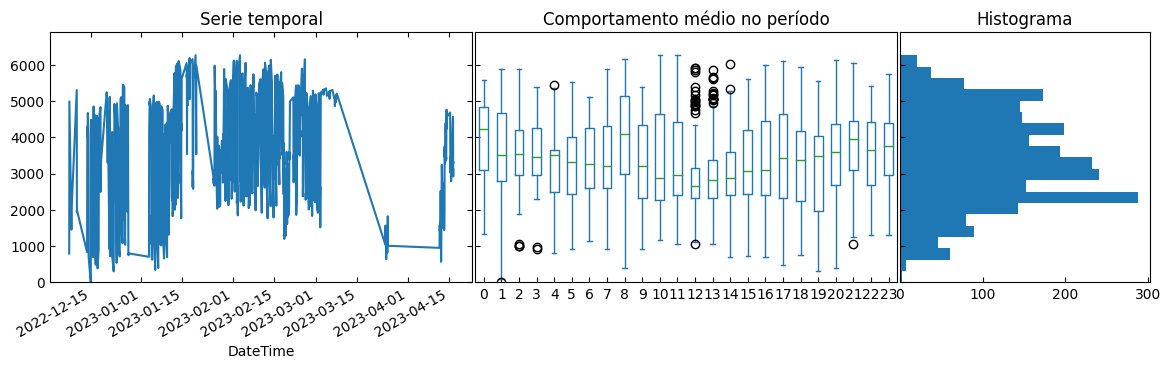

In [208]:
dataframe = valid_dataframe_1.rename(columns={'measuring 1 no Temp': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

### Sensor 2

In [209]:
from sklearn.linear_model import LinearRegression

sample_dataframe = valid_dataframe_2[['temperature', 'measuring 2']].dropna()
temperature = sample_dataframe['temperature']
concentration = sample_dataframe['measuring 2']

# Reshape the data to have a 2D array for sklearn
X = temperature.values.reshape(-1, 1)
y = concentration.values

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Predict concentration based on the temperature
concentration_predicted = model.predict(X)

# Remove the temperature component from the concentration
concentration_without_temperature = y - concentration_predicted

# Create a new pandas Series with the result
result_series = pd.Series(concentration_without_temperature - np.min(concentration_without_temperature), 
                            index=sample_dataframe.index, name = 'measuring 2 no Temp')

# Print the result
print(result_series)

DateTime
2022-12-01 20:45:00    155.363052
2022-12-01 21:00:00    155.378395
2022-12-01 21:15:00    155.288926
2022-12-01 21:30:00    155.899266
2022-12-01 21:45:00    157.086072
                          ...    
2023-03-31 19:15:00    177.267055
2023-03-31 19:30:00    179.770229
2023-03-31 19:45:00    181.664957
2023-03-31 20:00:00    182.429421
2023-03-31 20:15:00    182.436840
Name: measuring 2 no Temp, Length: 8209, dtype: float64


#### Plot the results

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_10514/7332354.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1)


Text(0.5, 1.0, 'Alphasense SO2 sensor 2 concentration without temperature component vs Sensor chamber temperature \n')

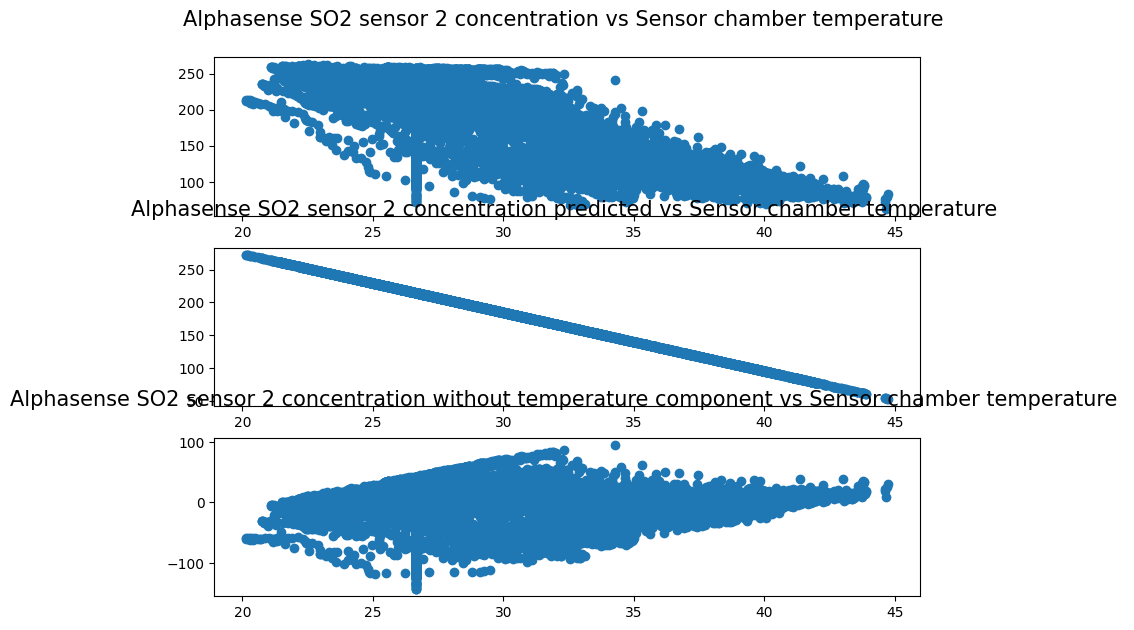

In [210]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.subplot(3,1,1)
plt.scatter(temperature, concentration)
plt.title('Alphasense SO2 sensor 2 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,2)
plt.scatter(temperature, concentration_predicted)
plt.title('Alphasense SO2 sensor 2 concentration predicted vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.subplot(3,1,3)
plt.scatter(temperature, concentration_without_temperature)
plt.title('Alphasense SO2 sensor 2 concentration without temperature component vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})

#### Store concentration without temperature in dataframe

In [211]:
valid_dataframe_2 = pd.concat([valid_dataframe_2,result_series], axis=1)
valid_dataframe_2.head()

,measuring 2,temperature,Hour,measuring 2 no Temp
DateTime,,,,
2022-11-21 11:30:00,NaN,30.375,11,NaN
2022-11-21 11:45:00,NaN,30.715,11,NaN
2022-11-21 12:00:00,NaN,30.905,12,NaN
2022-11-21 16:30:00,NaN,31.885,16,NaN
2022-11-21 16:45:00,NaN,31.815,16,NaN


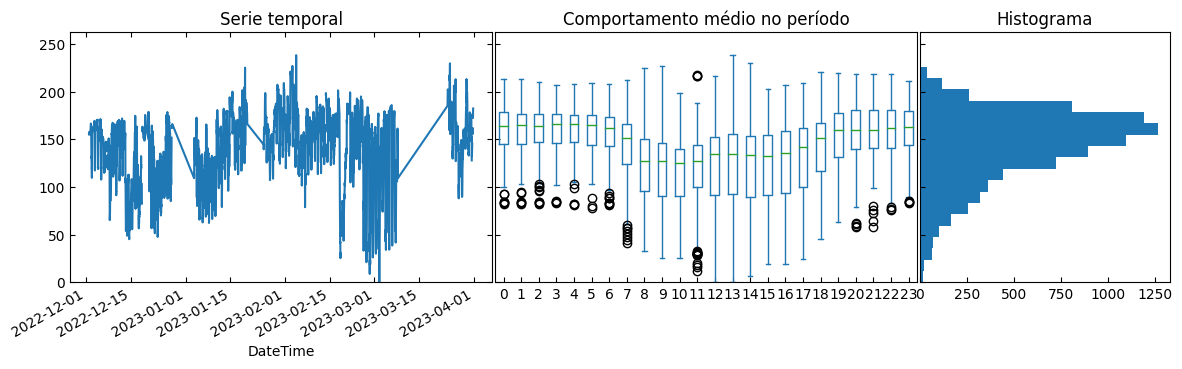

In [212]:
dataframe = valid_dataframe_2.rename(columns={'measuring 2 no Temp': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

## Plot sensor 1 vs. sensor 2

Spearmans correlation coefficient: 0.508
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.508
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.369, p<0.05")

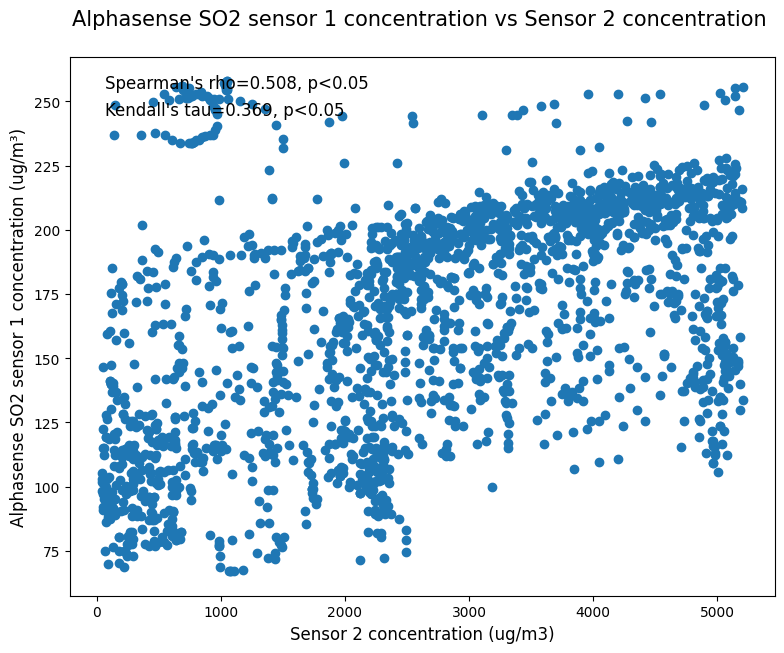

In [213]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'])
plt.title('Alphasense SO2 sensor 1 concentration vs Sensor 2 concentration \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor 2 concentration (ug/m3)', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor 1 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

# Resample Data

### Sensor 1

,measuring 1,temperature,Hour,measuring 1 no Temp,Count 1
DateTime,,,,,
2022-12-07 18:30:00,482.089234,27.99750,18,855.554880,2
2022-12-07 19:30:00,2334.044792,27.39125,19,2603.851233,4
2022-12-07 20:30:00,4806.533103,26.87500,20,4988.068922,1
2022-12-07 21:30:00,NaN,NaN,21,NaN,0
2022-12-07 22:30:00,NaN,NaN,22,NaN,0


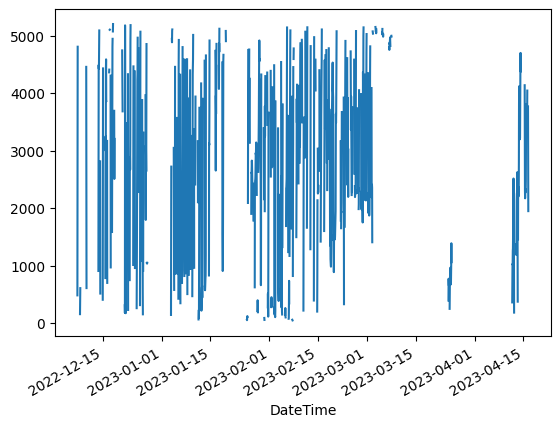

In [214]:
data_1_1HR = valid_dataframe_1.resample('H').mean()
data_1_1HR['Hour'] = data_1HR.index.hour
data_1_1HR['Count 1'] = (valid_dataframe_1['measuring 1'].resample('H').count())
data_1_1HR.index = data_1HR.index.map(lambda t: t.replace(minute=30, second=0))
data_1_1HR['measuring 1'].plot()
data_1_1HR.head()

#### Tag hourly data according to the number of samples in an hour
At least 3 samples must be valid in an hour (75 %) for the hourly data be considered as valid

<Axes: xlabel='DateTime'>

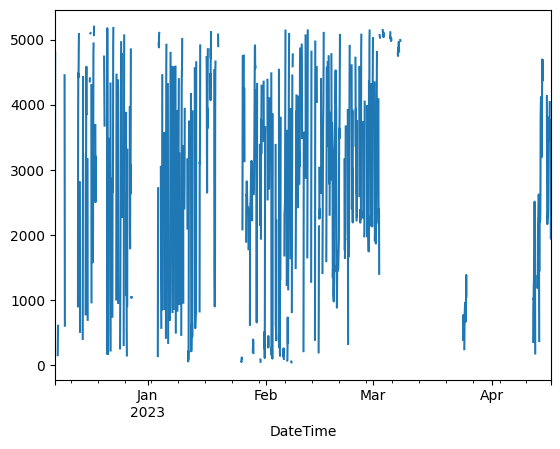

In [215]:
data_1_1HR['Tag'] = (data_1_1HR[['Count 1']].apply(lambda df: 'VALID' if df[0] >= 3 else 'LOWSAMPLES', 
                                                            axis=1))
data_1_1HR['measuring 1'].resample('H').mean().plot()

#### Valid data contabilization

In [216]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, data_1_1HR)
data_contabilization

,#,%
LOWSAMPLES,2543,81.689688
VALID,570,18.310312
TOTAL,3113,100.0


In [217]:
valid_data_1_1HR = data_1_1HR[data_1_1HR['Tag'] == 'VALID']

### Sensor 2

,measuring 2,temperature,Hour,measuring 2 no Temp,Count 2
DateTime,,,,,
2022-11-21 11:30:00,NaN,30.545,11,NaN,0
2022-11-21 12:30:00,NaN,30.905,12,NaN,0
2022-11-21 13:30:00,NaN,NaN,13,NaN,0
2022-11-21 14:30:00,NaN,NaN,14,NaN,0
2022-11-21 15:30:00,NaN,NaN,15,NaN,0


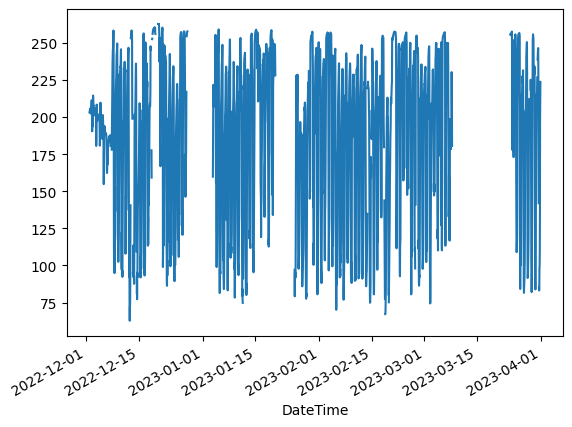

In [218]:
data_2_1HR = valid_dataframe_2.resample('H').mean()
data_2_1HR['Hour'] = data_2_1HR.index.hour
data_2_1HR['Count 2'] = (valid_dataframe_2['measuring 2'].resample('H').count())
data_2_1HR.index = data_2_1HR.index.map(lambda t: t.replace(minute=30, second=0))
data_2_1HR['measuring 2'].plot()
data_2_1HR.head()

#### Tag hourly data according to the number of samples in an hour
At least 3 samples must be valid in an hour (75 %) for the hourly data be considered as valid

<Axes: xlabel='DateTime'>

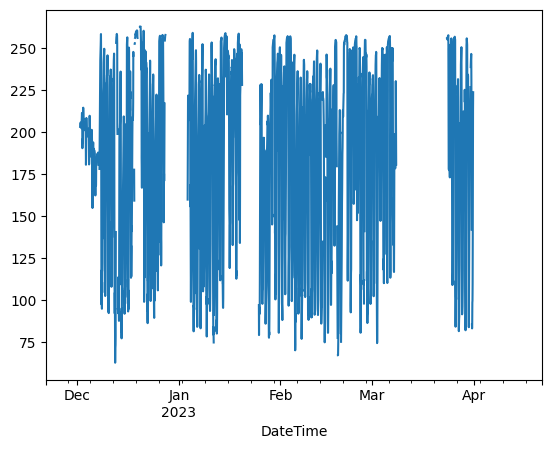

In [219]:
data_2_1HR['Tag'] = (data_2_1HR[['Count 2']].apply(lambda df: 'VALID' if df[0] >= 3 else 'LOWSAMPLES', 
                                                            axis=1))
data_2_1HR['measuring 2'].resample('H').mean().plot()

#### Valid data contabilization

In [220]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, data_2_1HR)
data_contabilization

,#,%
LOWSAMPLES,1601,44.044017
VALID,2034,55.955983
TOTAL,3635,100.0


In [221]:
valid_data_2_1HR = data_2_1HR[data_2_1HR['Tag'] == 'VALID']

# Save Data

In [222]:
import os

output_directory_path = 'data/output/'
processing_directory_path = '../data-processing/input/'
valid_filename = '_and_temp_valid.csv'
valid_filename_1HR = '_and_temp_valid_1HR.csv'

valid_1_1HR_file_path_output = output_directory_path + SENSOR_1_NAME + valid_filename_1HR
valid_1_file_path_output = output_directory_path + SENSOR_1_NAME + valid_filename

valid_2_1HR_file_path_output = output_directory_path + SENSOR_2_NAME + valid_filename_1HR
valid_2_file_path_output = output_directory_path + SENSOR_2_NAME + valid_filename

valid_1_processing_1HR_file_path = processing_directory_path + SENSOR_1_NAME + valid_filename_1HR
valid_1_processing_file_path = processing_directory_path + SENSOR_1_NAME + valid_filename

valid_2_processing_1HR_file_path = processing_directory_path + SENSOR_2_NAME + valid_filename_1HR
valid_2_processing_file_path = processing_directory_path + SENSOR_2_NAME + valid_filename

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

if not os.path.exists(processing_directory_path):
    os.makedirs(processing_directory_path)

valid_dataframe_1.to_csv(valid_1_file_path_output)
valid_data_1_1HR.to_csv(valid_1_1HR_file_path_output)

valid_dataframe_2.to_csv(valid_2_file_path_output)
valid_data_2_1HR.to_csv(valid_2_1HR_file_path_output)

valid_dataframe_1.to_csv(valid_1_processing_file_path)
valid_data_1_1HR.to_csv(valid_1_processing_1HR_file_path)

valid_dataframe_2.to_csv(valid_2_processing_file_path)
valid_data_2_1HR.to_csv(valid_2_processing_1HR_file_path)